# Data_range

In [14]:
import pandas as pd
import numpy as np

In [11]:
# periods = n : n개 데이터
# fred = 언제(주기)

# W : 첫번쨰 주말
print(pd.date_range(start = "2021-08", periods = 8 , freq = "W"))

# M : 해당월의 마지막날
print(pd.date_range(start = "2021-08", periods = 8 , freq = "M"))

# MS : 월의 첫번째날
print(pd.date_range(start = "2021-08", periods = 8 , freq = "MS"))

# BMS : 해당하는 월의 첫번째 평일
print(pd.date_range(start = "2021-08", periods = 8 , freq = "BMS"))

# 월요일만
print(pd.date_range(start = "2021-08-02", periods = 8 , freq = 7*'1d'))

DatetimeIndex(['2021-08-01', '2021-08-08', '2021-08-15', '2021-08-22',
               '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19'],
              dtype='datetime64[ns]', freq='W-SUN')
DatetimeIndex(['2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2021-08-02', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-03', '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', freq='BMS')


In [18]:
df= pd.DataFrame({
    'week' : pd.date_range(start = "2021-08-02", periods = 8, freq = 7 * "1d"),
    'sales' : [30, 44, 40, 45, 38, 43, 39, np.nan],
    '3MA'  : [0] * 8
})
df

,week,sales,3MA
0,2021-08-02,30.0,0
1,2021-08-09,44.0,0
2,2021-08-16,40.0,0
3,2021-08-23,45.0,0
4,2021-08-30,38.0,0
5,2021-09-06,43.0,0
6,2021-09-13,39.0,0
7,2021-09-20,NaN,0


In [26]:
# rolling(3) -> rolling을 적용시킵니다. 
# rolling은 sum, mean 등의 함수를 적용하는데 이때 어떤 데이터를 참조할지 알려줘야함
# 예를들어서 rolling(3)이면 현재 행과 이전 2개 행을 참조.
# 즉 총 3개의 행을 참조하는것
df[["sales"]].rolling(3).mean().shift(1)

,sales
0,NaN
1,NaN
2,NaN
3,38.0
4,43.0
5,41.0
6,42.0
7,40.0


# Apple 주식가격 예측


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
plt.style.use("ggplot")

In [166]:
apple_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/apple_stock.csv'

df = pd.read_csv(apple_path)

In [ ]:
# Date 탕ㅂ을 datetime 으로 변경
df["Date"] = pd.to_datetime(df["Date"])

df = df.set_index("Date")

df.info()

In [ ]:
df["Close"].plot(figsize = (20, 10))
plt.title("Cloase price for Apple")

In [170]:
df["Close_7Days_Mean"] = df["Close"].rolling(7).mean()

# 앞에서 10개
df[["Close","Close_7Days_Mean"]].head(10)

# 뒤에서 10개
df[["Close","Close_7Days_Mean"]].tail(10)

# 날짜 데이터 변수 
last_day = datetime(2019, 1, 2)

# df 새로운 last_day 행의 Close 열  =0 
df.loc[last_day, "Close"] = 0

# Shift(n) : n칸만큼 이동 
# 평균값  = 다음날 가격의 예측값이 -> 한칸이동
df["Close_7Days_Mean"]= df["Close_7Days_Mean"].shift(1)

In [ ]:
df.tail(10)

In [ ]:
df[["Close","Close_7Days_Mean"]].plot(figsize=(30,20))

In [ ]:
# rule = "M"   : 월별 그룹, 그룹이름은 그달의 마지막날
list(df.resample(rule = 'M'))


# 각 월별로 그룹나누고, 그룹의 평균, 그룹이름은 월별 마지막 날짜
df_monthly = df.resample(rule=  "M").mean()

# [Close_7Days_Mean]컬럼 제거
df_monthly= df_monthly.iloc[ : , : -1]

df_monthly.tail(10)

In [ ]:
# 월의 첫날을 그룹 이름으로 설정
list(df.resample(rule = "MS"))


In [ ]:
def first_day(group):
  print("=" * 50)
  print("group")
  print("=" * 50)
  print(group)
  print("=" * 50)

# agg(aggregate): DataFrame의 축(axis)을 기준으로 통계량을 집계(aggregate)하기 위한 함수
# 통계량(statistics): 합계(sum), 평균(mean), 분산(var), 표준편차(std),
# 최솟값(min), 최댓값(max), 중앙값(median), ...
# agg 함수는 집계가 목적이기 때문에 데이터 타입이 숫자 타입인 행/열에만
# 함수를 적용해서 계산한다

df.resample(rule = "MS").agg(first_day)

In [190]:
def first_day2(group):
  return group.iloc[0]

# 매월 첫날의 종가
df_start_day = df.resample(rule = "MS").agg(first_day2)[["Close"]]

In [ ]:
df_start_day

In [182]:
# 2009년 12월 종가, 2019년 1월 정보 빼고 생성
df_start_day = df_start_day.iloc[1:-1]

# "Close" 컬럼이름 변경
df_start_day = df_start_day.rename(columns = {"Close":"Real Close"})

In [ ]:
df_start_day

In [ ]:
# Date는 그룹명 (월의 첫째날)
df.resample(rule = "MS").mean()[["Close"]]

In [158]:
# "Predict Close"컬럼에  해당 월의 종가평균의 값으로 채움
df_start_day["Predict Close"] = df.resample(rule = "MS").mean()[["Close"]]

# 2월에서 예측된 종가는 3월 종가를 예측하는것이니 한칸 이동
df_start_day["Predict Close"] = df_start_day["Predict Close"].shift(1)

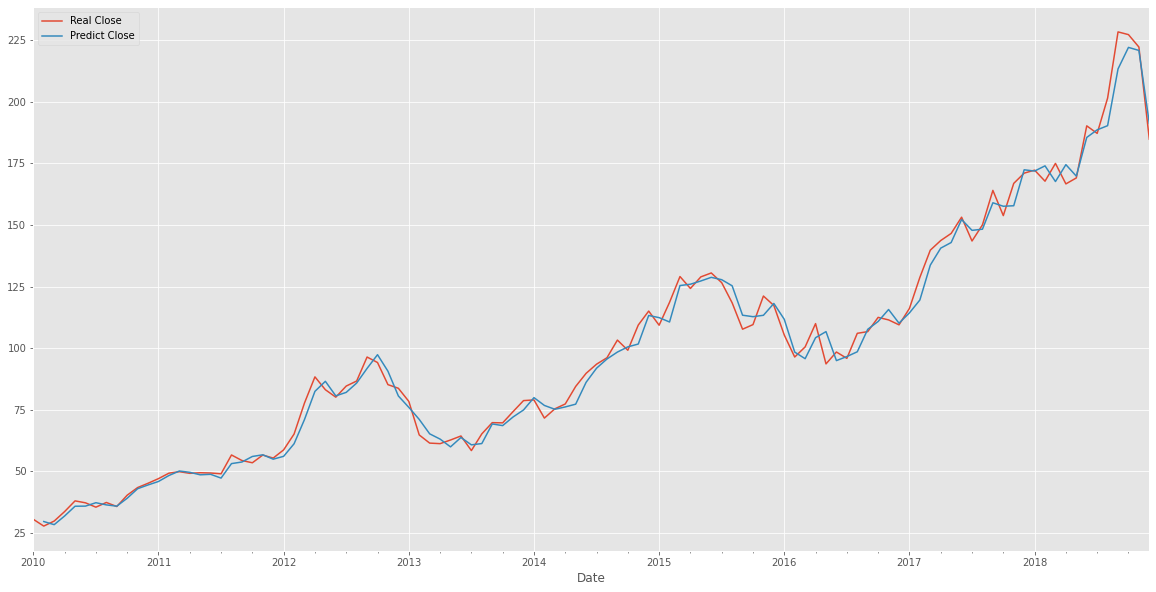

In [149]:
df_start_day.plot(figsize = (20, 10))

In [159]:
# 3개월 평균
df_start_day["Close_3Month_Mean"] = df_start_day.rolling(3).mean()["Predict Close"]

In [ ]:
df_start_day.head(10)

In [ ]:
df_start_day["Close_3Month_Mean"]= df_start_day["Close_3Month_Mean"].shift(1)
df_start_day

In [ ]:
df_start_day = df_start_day.rename(columns = {"Predict Close" : "Close_1Month_Mean"})
df_start_day

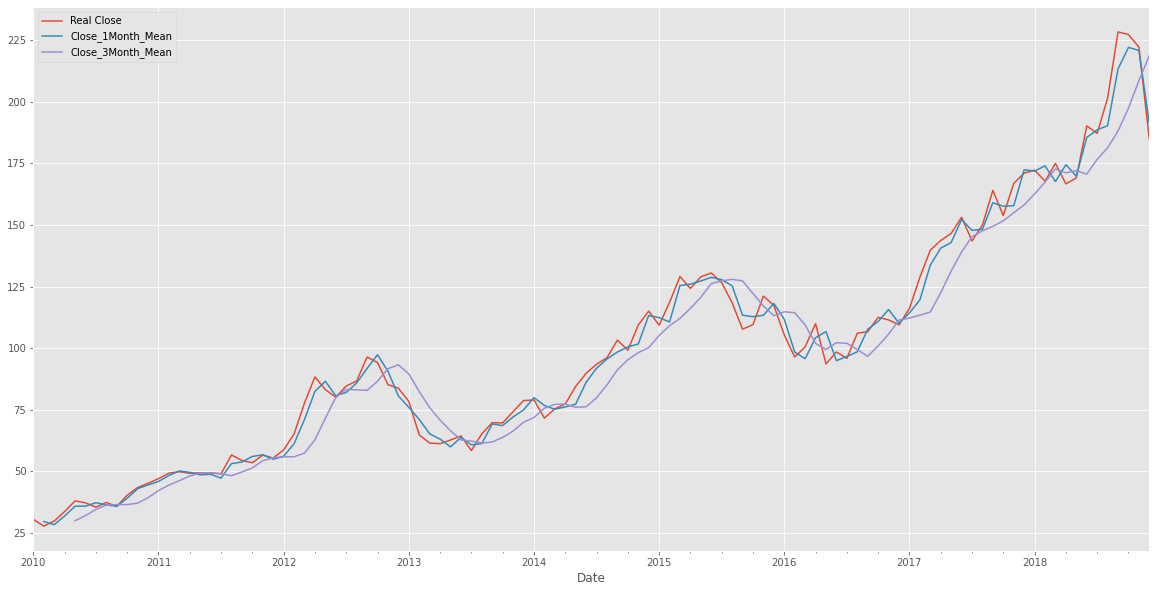

In [163]:
df_start_day.plot(figsize = (20, 10))

# 실습

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [205]:
plt.style.use("ggplot")

In [ ]:
plt.style.use("ggplot")
apple_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/apple_stock.csv'

# csv 로드
df = pd.read_csv(apple_path)

# Date칼럼 date타입으로 형 변화
df["Date"] = pd.to_datetime(df["Date"])

# Date칼럼 index설정
df = df.set_index("Date")

# Close컬럼 그래프로 그리기
df[['Close']].plot(figsize= (20, 10))
plt.title("Close Price for Apple")

In [228]:
# 7일간 가격 평균
df.rolling(7).mean().head(20)

# 7일간 종가 평균
df[["Close"]].rolling(7).mean()

# rolling 결과를 새컬럼 Close_7Days_Mean에 추가
df["Close_7Days_Mean"] = df['Close'].rolling(7).mean()

df[["Close", "Close_7Days_Mean"]].head(10)

# 날짜 생성
last_day = datetime(2019,1,2)

# 생성한 날짜 Row 추가
df.loc[last_day, "Close"] = np.nan

In [ ]:
df.tail(10)

In [ ]:
# 7일 평균을 한칸씩 아래로 이동하고 추가
df['Close_7Days_Mean'] = df['Close'].rolling(7).mean().shift(1)

# 시각화
df[["Close", "Close_7Days_Mean"]].plot(figsize=(30,20))



In [ ]:
df_monthly = df.resample(rule = 'M').mean()
df_monthly

In [ ]:
df_monthly = df_monthly.iloc[:, :-1]
df_monthly

Text(0.5, 1.0, 'Monthly Mean Close Prcie for Apple')

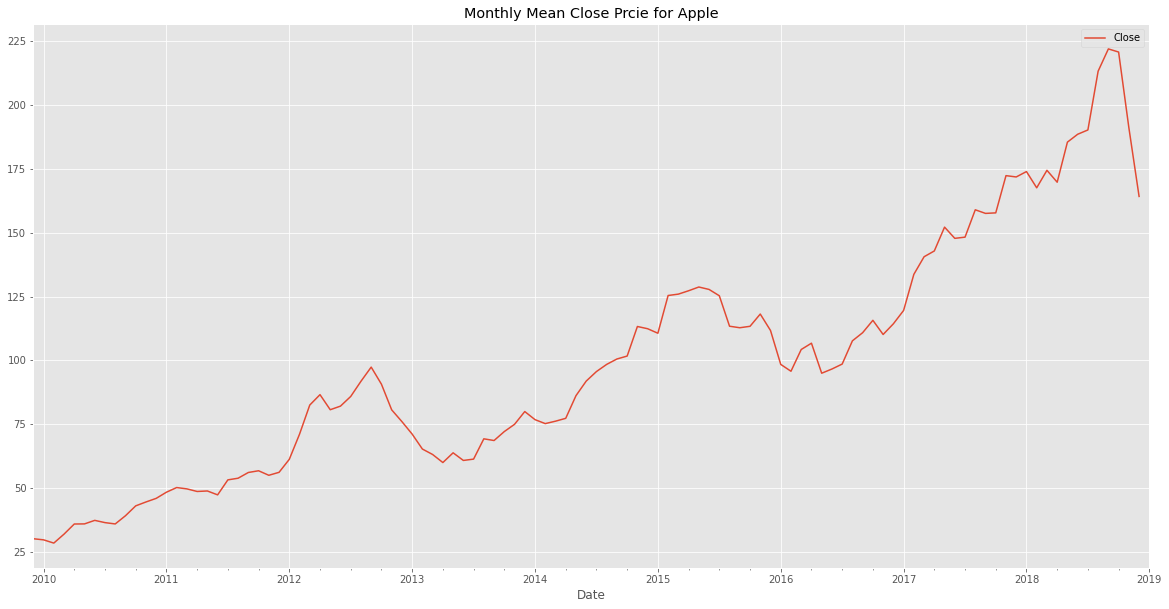

In [233]:
df_monthly[["Close"]].plot(figsize = (20, 10))
plt.title("Monthly Mean Close Prcie for Apple")

In [236]:
df_monthly['Close_3Month_Mean'] = df_monthly["Close"].rolling(3).mean()
df_monthly

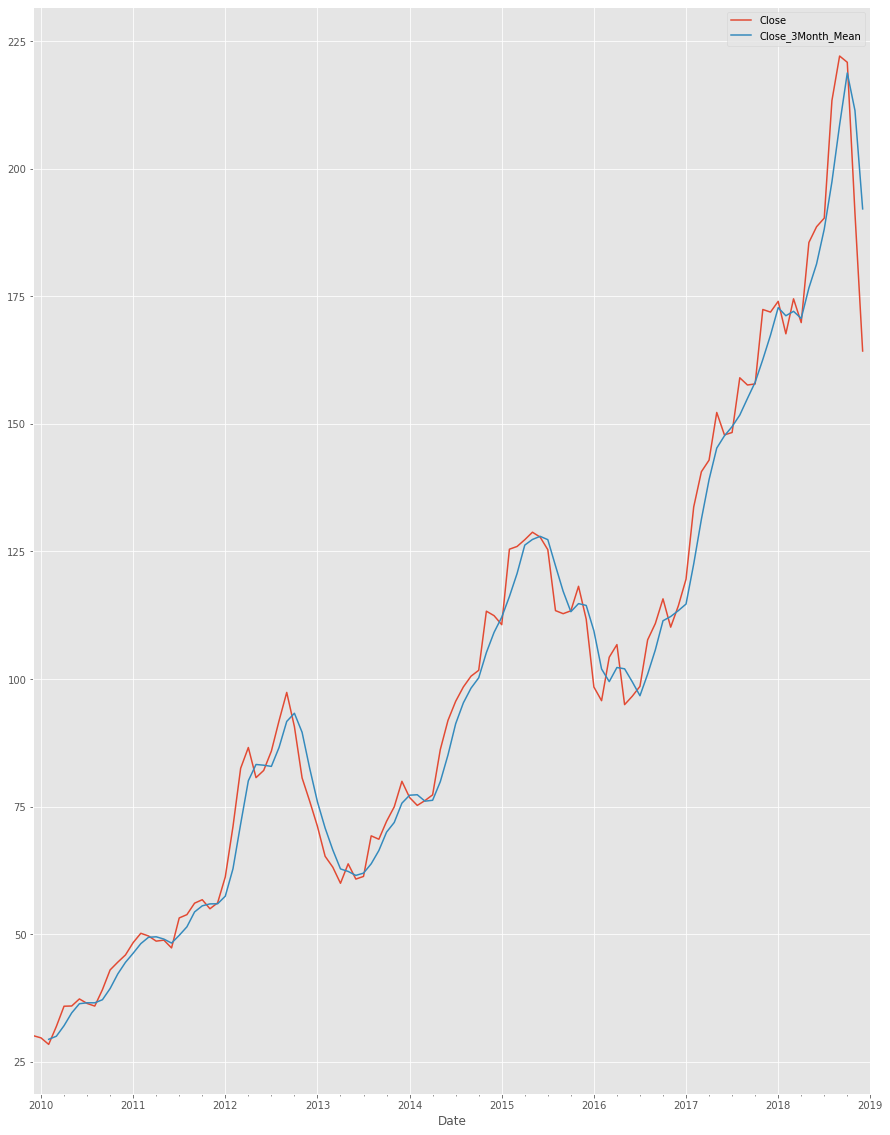

In [240]:
df_monthly[["Close","Close_3Month_Mean"]].plot(figsize=(15,20))